### 機械学習を用いて提供されたデータを分析することで、A社の課題を設定し、これを解決する新規事業の内容・効果を示します

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import lightgbm as lgb

%matplotlib inline
plt.rcParams['font.family'] = 'Hiragino sans'
plt.style.use("ggplot")

# ランダムシードの設定
import random
np.random.seed(1234)
random.seed(1234)

In [3]:
df = pd.read_csv('Telecom_customer churn.csv')

In [4]:
categories = df.columns[df.dtypes == "object"]
print(categories)

Index(['new_cell', 'crclscod', 'asl_flag', 'prizm_social_one', 'area',
       'dualband', 'refurb_new', 'hnd_webcap', 'ownrent', 'dwlltype',
       'marital', 'infobase', 'HHstatin', 'dwllsize', 'ethnic', 'kid0_2',
       'kid3_5', 'kid6_10', 'kid11_15', 'kid16_17', 'creditcd'],
      dtype='object')


In [5]:
# カテゴリ変数にするよ
for cat in categories:
    le = LabelEncoder()
    print(cat)

    df[cat].fillna("missing", inplace=True)
    le = le.fit(df[cat])
    df[cat]= le.transform(df[cat])
    df[cat]= df[cat].astype("category")

new_cell
crclscod
asl_flag
prizm_social_one
area
dualband
refurb_new
hnd_webcap
ownrent
dwlltype
marital
infobase
HHstatin
dwllsize
ethnic
kid0_2
kid3_5
kid6_10
kid11_15
kid16_17
creditcd


In [6]:
df.dtypes

rev_Mean        float64
mou_Mean        float64
totmrc_Mean     float64
da_Mean         float64
ovrmou_Mean     float64
                 ...   
kid11_15       category
kid16_17       category
creditcd       category
eqpdays         float64
Customer_ID       int64
Length: 100, dtype: object

In [7]:
# churn == 1ならば解約
tmp_df = df.groupby('churn').mean()
tmp_df

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,models,truck,rv,lor,adults,income,numbcars,forgntvl,eqpdays,Customer_ID
churn,,,,,,,,,,,,,,,,,,,,,
0,59.218692,543.206895,47.782378,0.918039,39.172904,12.842879,12.573835,0.265309,1.150619,-5.344265,...,1.585959,0.190411,0.082447,6.383884,2.541654,5.771879,1.566100,0.059130,363.280925,1.051224e+06
1,58.211074,483.306417,44.543091,0.859019,43.010449,14.290904,14.031045,0.257244,1.424969,-22.759003,...,1.504984,0.187204,0.082716,5.960302,2.518496,5.794841,1.569092,0.056799,421.089524,1.048755e+06


In [8]:
tmp_df.to_csv('tmp_df_cat.csv')

In [9]:
tmp_df.isnull().sum().sum()

0

In [10]:
# lightGBMによるクロスバリデーション
from sklearn.model_selection import KFold
folds = 3
kf = KFold(n_splits=folds)

In [11]:
# LightGBMのハイパーパラメータの設定
lgbm_params = {
    "objective":"regression",
    "random_seed":1234
}

In [12]:
# 説明変数と目的変数を指定する
train_X = df.drop(["churn"], axis=1)
train_Y = df["churn"]

In [13]:
train_X

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
0,23.9975,219.25,22.500,0.2475,0.00,0.0,0.0,0.0,0.0,-157.25,...,0.0,9,0,0,0,0,0,1,361.0,1000001
1,57.4925,482.75,37.425,0.2475,22.75,9.1,9.1,0.0,0.0,532.25,...,0.0,16,0,0,0,0,0,1,240.0,1000002
2,16.9900,10.25,16.990,0.0000,0.00,0.0,0.0,0.0,0.0,-4.25,...,0.0,9,0,1,0,0,0,1,1504.0,1000003
3,38.0000,7.50,38.000,0.0000,0.00,0.0,0.0,0.0,0.0,-1.50,...,0.0,14,1,0,0,0,0,1,1812.0,1000004
4,55.2300,570.50,71.980,0.0000,0.00,0.0,0.0,0.0,0.0,38.50,...,0.0,6,0,0,0,0,0,1,434.0,1000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,13,0,0,0,1,0,1,773.0,1099996
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,9,0,0,1,1,1,1,835.0,1099997
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,14,1,1,0,0,0,0,433.0,1099998
99998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,13,0,0,0,0,0,0,75.0,1099999


In [14]:
## 各foldごとに作成したモデルごとの予測値を保存
models = []
oof = np.zeros(len(train_X))

for train_index, val_index in kf.split(train_X):
    X_train = train_X.iloc[train_index]
    X_valid = train_X.iloc[val_index]
    y_train = train_Y.iloc[train_index]
    y_valid = train_Y.iloc[val_index]

    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_valid, y_valid, reference=lgb_train)

    model_lgb = lgb.train(lgbm_params,
        lgb_train,
        valid_sets=lgb_eval,
        num_boost_round=100,
        early_stopping_rounds=20,
        verbose_eval=10,
        )

    y_pred = model_lgb.predict(X_valid, num_iteration=model_lgb.best_iteration)

    models.append(model_lgb)
    oof[val_index] = y_pred 

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.096152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15077
[LightGBM] [Info] Number of data points in the train set: 66666, number of used features: 99


/Users/gr39my/.pyenv/versions/3.8.5/lib/python3.8/site-packages/lightgbm/basic.py:1433: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
/Users/gr39my/.pyenv/versions/3.8.5/lib/python3.8/site-packages/lightgbm/basic.py:1245: UserWarning: categorical_column in param dict is overridden.
  _log_warning('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Info] Start training from score 0.494390
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.24049
[20]	valid_0's l2: 0.236427
[30]	valid_0's l2: 0.23432
[40]	valid_0's l2: 0.233199
[50]	valid_0's l2: 0.232332
[60]	valid_0's l2: 0.231398
[70]	valid_0's l2: 0.23108
[80]	valid_0's l2: 0.230958
[90]	valid_0's l2: 0.230956
[100]	valid_0's l2: 0.230838
Did not meet early stopping. Best iteration is:
[100]	valid_0's l2: 0.230838
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.209030 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 15053
[LightGBM] [Info] Number of data points in the train set: 66667, number of used features: 99
[LightGBM] [Info] Start training from score 0.477253
Training until validation scores don't improve for 20 rounds
[10]	valid_0's l2: 0.240259
[20]	valid_0's l2: 0.235996
[30]	valid_0's l2: 0.233482
[40]	valid_0's l2: 0.231877
[50]	valid_0

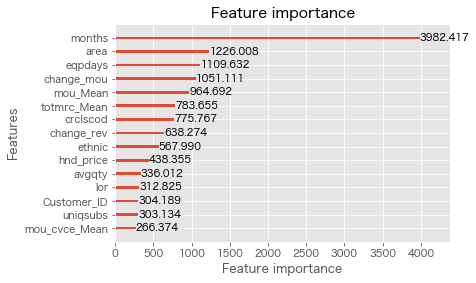

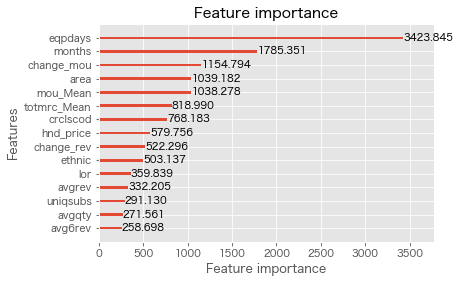

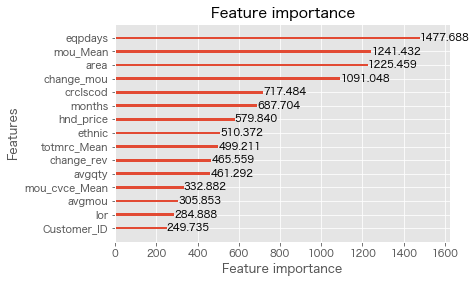

In [15]:
# 各変数の重要度を確認する
for model in models:
    lgb.plot_importance(model, importance_type="gain",max_num_features=15)

In [40]:
pd.DataFrame(y_pred,y_valid)
#y_valid.to_list()
#y_pred

,0
churn,
0,0.634770
0,0.203038
1,0.654994
0,0.606142
0,0.381701
...,...
1,0.988012
0,0.869951
0,1.053978


/Users/gr39my/.pyenv/versions/3.8.5/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='churn', ylabel='count'>

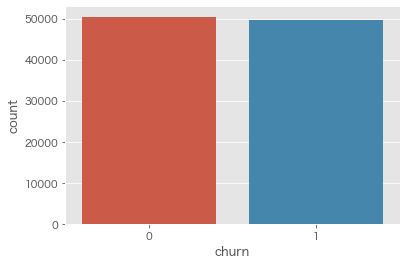

In [30]:
# ヒストグラム書こう
sns.countplot('churn',data=df)

<AxesSubplot:xlabel='mou_Mean', ylabel='count'>

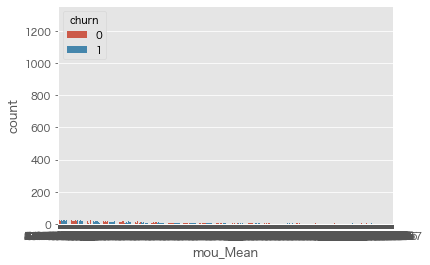

In [35]:
#plt.hist([df['mou_Mean'],df['churn']])
sns.countplot('mou_Mean',hue='churn',data=df)

In [36]:
#sns.countplot('eqpdays',hue='churn',data=df)

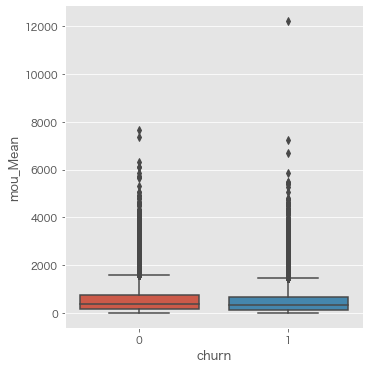

In [41]:
sns.catplot(x = 'churn', y = 'mou_Mean', data = df, kind = 'box')

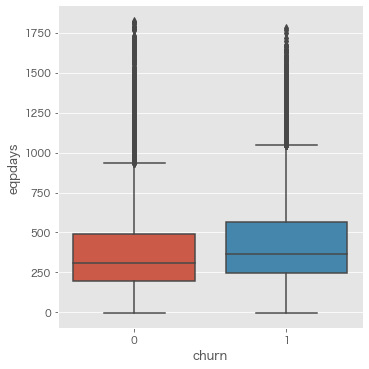

In [40]:
sns.catplot(x = 'churn', y = 'eqpdays', data = df, kind = 'box')

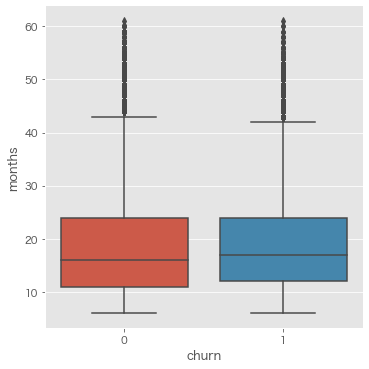

In [44]:
sns.catplot(x = 'churn', y = 'months', data = df, kind = 'box')

In [46]:
sns.catplot(x = 'eqpdays', y = 'months',hue = 'churn', split = True,data = df, kind = 'violin')

KeyboardInterrupt: 